<h1  align="center">CIDM6351: Homework 2 Instructions. Importing and Cleaning Data</h1>

* **Save a copy to your Google Drive and answer the questions on your copy**
* **Change the share to "Anyone with link" so the professor can view your code**
* **Submit the share link of your Colab Notebook to WTClass**
* This assignment is open notes/Internet/Datacamp but you can only consult with a CIS tutors or the professor.
- Students should complete this assignment **individually.** If you need help, contact a CIS tutor or the professor.

### Scenario: You are a data engineer for a large ice cream manufacturing company. Company stake holders want to know which ice cream flavors to diversity into. You need to gather and prepare some data on the favorite types of ice cream. You find some survey data on this topic. You will import the data, perform some cleaning tasks, and create a simple bar chart of the most popular ice cream flavors and the percentage of adults who like those flavors. ###
Original data comes from https://fox8.com/news/the-21-most-popular-ice-cream-flavors-in-america/

###Data Dictionary: ###  
Both data files have the following fields/columns.

Ice_Cream_Flavor : <str> The name of the ice cream.  
Like_It_Percentage : <str> The percetage of adults surveyed who like that particular ice cream flavor.  
Favorite_Percentage : <str> The percentage of adults surveyed who say that flavor is their favorite.  

# Question 1 (30%): Importing data with Pandas

In [ ]:
ice_cream_part_one_url = 'https://raw.githubusercontent.com/sean-humpherys/randomfilestorage/main/ice_cream_part_one.csv'
ice_cream_part_two_url = 'https://raw.githubusercontent.com/sean-humpherys/randomfilestorage/main/ice_cream_part_two.json'

### Q1.1 (5%) Import the pandas library as pd

In [ ]:
# --- put your answer below ---
import pandas as pd

### Q1.2  (5%) Load the data stored in ```ice_cream_part_one.csv``` into Pandas DataFrames. No need to print the data yet.

In [ ]:
# --- put your answer below ---
ice_cream_part_one = pd.read_csv(ice_cream_part_one_url)

### Q1.3  (5%) Load the data stored in ```ice_cream_part_two.json``` into Pandas DataFrames. No need to print the data yet.

In [ ]:
# --- put your answer below ---
ice_cream_part_two = pd.read_json(ice_cream_part_two_url)

### 1.4  (5%) Print the information or head of both dataframes, respectively

In [ ]:
# ---put your answer below--
print(ice_cream_part_one.head())
print(ice_cream_part_two.head())

  Ice_Cream_Flavor Like_It_Percentage Favorite_Percentage
0            peach                22%                  1%
1     butterscotch                16%                  1%
2   chocolate chip                39%                  2%
3        chocolate                51%                 10%
4          vanilla                59%                 11%
          Ice_Cream_Flavor Like_It_Percentage Favorite_Percentage
0               strawberry                43%                  6%
1  chocolate peanut butter                26%                  5%
2             butter pecan                35%                  8%
3        cookies and cream                43%                  7%
4      mint chocolate chip                33%                  9%


### 1.5  (5%) Combine the two dataframes into one panda dataframe called "ice_cream". ###
If you need a hint, search on Google "combine two pandas dataframes", "join two pandas dataframes", or "concatenate pandas dataframe". Searching with the correct phrase is a useful data engineering technique.

In [ ]:
# ---put your answer below ---
ice_cream=pd.concat([ice_cream_part_one, ice_cream_part_two], ignore_index=True)

### 1.6  (5%) Print the contents of the ice_cream dataframe. ###

In [ ]:
# ---put your answer below ---
print(ice_cream)

               Ice_Cream_Flavor Like_It_Percentage Favorite_Percentage
0                         peach                22%                  1%
1                  butterscotch                16%                  1%
2                chocolate chip                39%                  2%
3                     chocolate                51%                 10%
4                       vanilla                59%                 11%
5                        coffee                23%                  5%
6                       caramel                33%                  3%
7                 peanut butter                21%                  2%
8                    neopolitan                30%                  2%
9                        cherry                23%                  2%
10  chocolate chip cookie dough                34%                  6%
11                birthday cake                20%                  2%
12                    raspberry                18%                  1%
13    

# Question Two. (50%) Clean the data in preparation for data analysis. #


### Q2.1 (10%) Remove missing data. Notice the row on Jalapeno ice cream does not have like it percentage or favorite percentage. Remove any row with missing data.###
This was not taught yet in Datacamp. However, as a data engineer you will find yourself needing to learn how to do tasks not previously learned before. Consider searching Google for "pandas remove missing values" or "pandas remove blank rows".

In [ ]:
# --- put your answer below ---
ice_cream.dropna(inplace= True)

### Q2.2 (10%) Capitalize all the ice cream flavor names. Each word should start with a capital letter, e.g. "rocky road" should become "Rocky Road". Print the contents of the Ice_Cream_Flavors column to show you were successful.###
This was not taught in Datacamp. However, as a data engineer you will find yourself needing to learn how to do tasks not previously learned before. Consider searching Google for "how to capitalize first letter in a word in pandas dataframe" or "capitalize first letter of each word in pandas".

In [ ]:
# --- put your answer below ---
ice_cream['Ice_Cream_Flavor']= ice_cream['Ice_Cream_Flavor'].str.title()
print(ice_cream.head())

  Ice_Cream_Flavor Like_It_Percentage Favorite_Percentage
0            Peach                22%                  1%
1     Butterscotch                16%                  1%
2   Chocolate Chip                39%                  2%
3        Chocolate                51%                 10%
4          Vanilla                59%                 11%


### Q2.3 (10%) Remove the % character from the values in "Like_It_Percentage" and "Favorite_Percentage". And, print the contents of the dataframe to show you were successful.###
For example, the value 35% becomes just 35. We don't need the % character. We just want the integers. Consider searching Google for "how to remove the last character from pandas column".

In [ ]:
# --- put your answer below ---
ice_cream['Like_It_Percentage']= ice_cream['Like_It_Percentage'].str.rstrip('%').astype(float)
ice_cream['Favorite_Percentage']= ice_cream['Favorite_Percentage'].str.rstrip('%').astype(float)
print(ice_cream.head())

  Ice_Cream_Flavor  Like_It_Percentage  Favorite_Percentage
0            Peach                22.0                  1.0
1     Butterscotch                16.0                  1.0
2   Chocolate Chip                39.0                  2.0
3        Chocolate                51.0                 10.0
4          Vanilla                59.0                 11.0


### Q2.4 (10%) List the data so we know the most favorite to least faavorite ice cream flavors. Sort the data based by the highest liked percentage to the lowest liked percentage. If there is a tie, secondarily sort by those who say the ice cream is their favorite. Print the sorted dataframe.###

In [ ]:
# --- put your answer below ---
ice_cream= ice_cream.sort_values(by=['Like_It_Percentage', 'Favorite_Percentage'], ascending= [False, False])
print(ice_cream)

               Ice_Cream_Flavor  Like_It_Percentage  Favorite_Percentage
4                       Vanilla                59.0                 11.0
3                     Chocolate                51.0                 10.0
20            Cookies And Cream                43.0                  7.0
17                   Strawberry                43.0                  6.0
2                Chocolate Chip                39.0                  2.0
19                 Butter Pecan                35.0                  8.0
10  Chocolate Chip Cookie Dough                34.0                  6.0
21          Mint Chocolate Chip                33.0                  9.0
6                       Caramel                33.0                  3.0
8                    Neopolitan                30.0                  2.0
14                   Rocky Road                29.0                  4.0
18      Chocolate Peanut Butter                26.0                  5.0
5                        Coffee                23.0

### Q2.5 (10%) Filter out any ice cream flavors with a like it percentage less than 20%, keep those with a value of 20% and above. Store the new dataset in a dataframe called "top_ice_creams". Print the new dataframe.##

In [ ]:
# --- put your answer below ---
top_ice_creams= ice_cream[ice_cream['Like_It_Percentage']>= 20]
print(top_ice_creams)

               Ice_Cream_Flavor  Like_It_Percentage  Favorite_Percentage
4                       Vanilla                59.0                 11.0
3                     Chocolate                51.0                 10.0
20            Cookies And Cream                43.0                  7.0
17                   Strawberry                43.0                  6.0
2                Chocolate Chip                39.0                  2.0
19                 Butter Pecan                35.0                  8.0
10  Chocolate Chip Cookie Dough                34.0                  6.0
21          Mint Chocolate Chip                33.0                  9.0
6                       Caramel                33.0                  3.0
8                    Neopolitan                30.0                  2.0
14                   Rocky Road                29.0                  4.0
18      Chocolate Peanut Butter                26.0                  5.0
5                        Coffee                23.0

# Question Three (20%) #
###Create a simple bar graph of the top 20 ice cream flavors. Put the ice cream flavors on the x-axis and the like it percentage on the y-axis. Show the bar graph.###
Consider searching Google with "pandas bar chart" or "pandas plot".


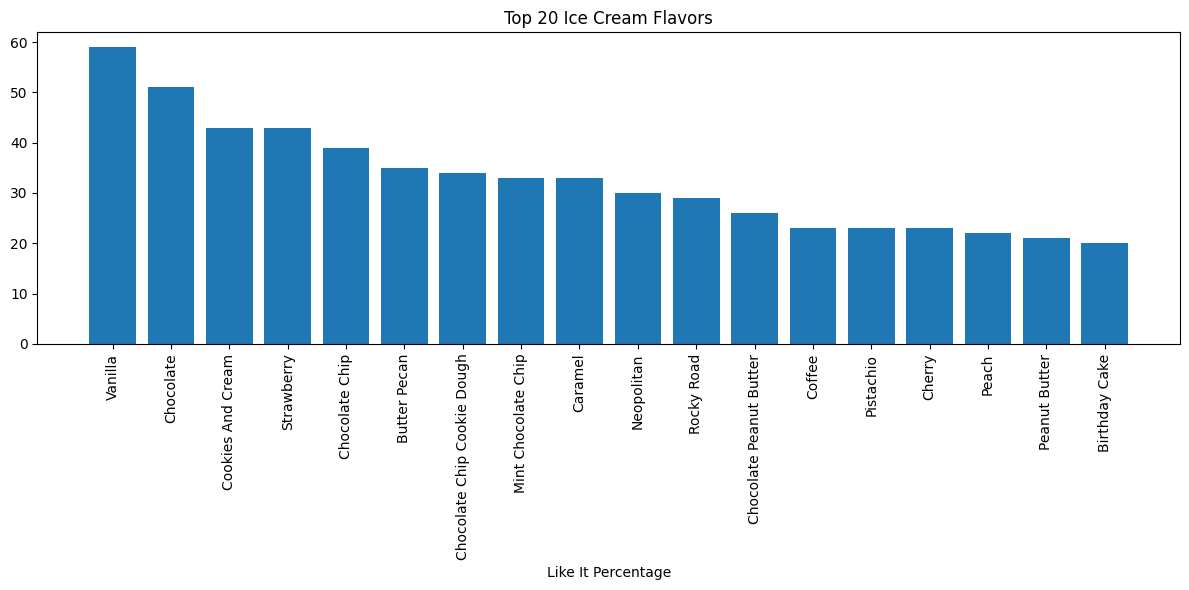

In [ ]:
# -- put your answer below ---
import matplotlib.pyplot as plt

top_20= top_ice_creams.head(20)
plt.figure(figsize=(12, 6))
plt.bar(top_20['Ice_Cream_Flavor'], top_20['Like_It_Percentage'])
plt.xticks(rotation=90)
plt.xlabel('Ice Cream Flavor')
plt.xlabel('Like It Percentage')
plt.title("Top 20 Ice Cream Flavors")
plt.tight_layout()
plt.show()

### The End. Congrats on importing and cleaning data, with a simple data visualization at the end. ###
If you need help, reach out to the CIS tutors or the professor.